# **SOLVING EIGENVALUES AND TRANSPORT PROBLEM THROUGH 1D SCHRODINGER EQUATION**

1D Schrodinger equation is given by:
**$$-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$**
where $m$ is the mass of the particle, $\hbar$ is the reduced Planck's constant, E is the energy level, $\psi(x)$ is the wavefunction and $V(x)$ is the potential.

We can write the Schrodinger equation in form of $\psi"(x)$:
**$$\psi"(x)+\frac{2m}{\hbar^2}[E-V(x)]\psi(x)=0$$**
which in the same form of linear shooting method (also known as Sturm-Liouville problem) with $p(x)=1$,$q(x)=2m[E-V(x)]/\hbar^2$ and $r(x)=0$.

We start by import all the required libraries. In this code we import two main libraries which are NumPy and matplotlib.pyplot. NumPy provides tools for working with arrays, performing mathematical operations meanwhile matplotlib.pyplot is use for creating visualizations like plots, graphs, and charts.

In [200]:
import numpy as np
import matplotlib.pyplot as plt

Next we define all the constants parameters for our potential function and eigenvalues function. We also define the boundary and step size for our graph later.

In [201]:
# Define all the constants parameter
hbar = 1.0      # Reduced Planck's constant
m = 1.0         # Mass of particle
alpha = 1.0     #alpha parameter for the potential well
lambda_ = 4.0   #lambda parameter for the potential well

a = -3     # Left boundary
b = 3      # Right boundary
dx = 0.01  # Step size
x = np.arange(a,b,dx)


Next, we define and plot the potential well for us can visualise the graph of potential first. The potential well is given by:
$$
V(x)=\frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)[\frac{1}{2}-\frac{1}{cosh^2(x)}]
$$



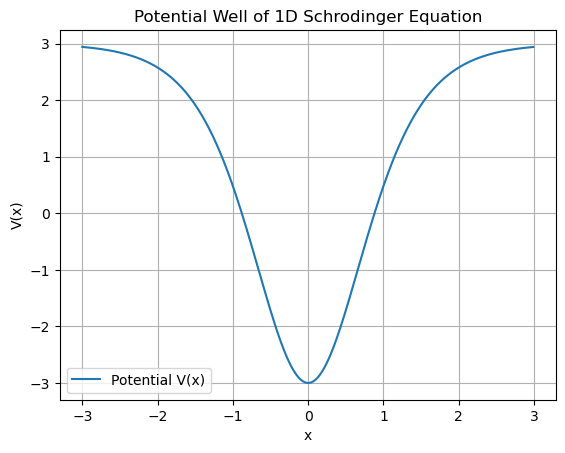

In [202]:
# Define the potential well
def potential_well(x):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * lambda_ * (lambda_ - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)
V = potential_well(x)

plt.plot(x, V, label="Potential V(x)")
plt.title("Potential Well of 1D Schrodinger Equation")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.legend()
plt.grid()
plt.show()

**Numerov Method**
The Numerov method is a numerical technique used to solve second-order differential equations of the form:
$$
\frac{d^2\psi(x)}{dx^2}=f(x)\psi(x)
$$
In quantum mechanics, it is particularly useful for solving the time independent Schrodinger equation:
$$-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$
Rewriting it, we get:
$$
\frac{d^2\psi(x)}{dx^2}=\frac{2m}{\hbar^2}[E-V(x)]\psi(x)
$$
A term is defined as k given by:
$$
k(x)=\frac{2m}{\hbar^2}[E-V(x)]
$$
Numerov's method avoids direct calculation of second derivatives by using a recurrence relation:
$$
\psi_{i+1}=\frac{\psi_{i}(2+\frac{10dx^2}{12}k_{i})-\psi_{i-1}(1-\frac{dx^2}{12}k_{i-1})}{1-\frac{dx^2}{12}k_{i+1}}
$$
where:
- $h=dx$ is the step size
- $k(x)$ is depends on the the potential $V(x)$ and energy $E$
- $\psi_i$ is the wavefunction at position $x_i$

Steps to apply Numerov method
1. Set initial conditions:
   - start with $\psi_{0}=0$(boundary condition) and a small non-zero value for $\psi_{1}$.(e.g. $1e-6$)
2. Define $k(x)$:
   - Calculate $k(x)=\frac{2m}{\hbar^2}[E-V(x)]$ at each grid point
3. Iterate using the recurrence relation:
   - Use Numerov's formula to compute $\psi(x)$ step-by-step along the grid
4. Normalize the wavefunction:
   - Scale $\psi(x)$ so that its maximum value is 1 or normalized it based on probability









In [203]:
# Define the numerov method
def numerov(x, E, V):
    dx2 = dx**2              # Square of the step size

    # Initaialize wavefunction array
    psi = np.zeros_like(x)
    psi[0] = 0.0       # Boundary condition
    psi[1] = 1e-6      # Small non-zero initial value

    # Compute k(x)
    k = ((2*m)/hbar**2)*(E-V)

    # Numerov recurrence relation
    for i in range(1, len(x) - 1):
        psi[i + 1] = (2 * (1 - 5/12 * dx2 * k[i]) * psi[i] - (1 + 1/12 * dx2 * k[i-1]) * psi[i-1]) / (1 + 1/12 * dx2 * k[i+1])
    return psi

**THE EIGENVALUE PROBELEM**

For eigenvalue problem, the particle is confined by the potential well $V(x)$ so that $\psi(x)\rightarrow0$ with $x\rightarrow\infty$. To solve this eigenvalue problem, we can integrate the equation with Numerov algorithm either from left to right or right to left of the potential region.

Since the wavefunction goes to zero as $|x|\rightarrow\infty$, the integration from one side to another requires integrating from exponentially increasing region to an oscillatory region and then into exponentially decreasing region.

To solve and reduced error when integrating the region, we need to integrate/obtain the solutions from both sides and match them in well region. Matching is done when the energy is equal to potential energy, i.e $x_l$ and $x_r$. The so-called matching here is to adjust the trial eigenvalue until the solution integrated from the right $\psi_r(x)$, and the solution integrated from the left $\psi_l(x)$ satisfy the boundary conditions at one of the turning points.

Choosing the turning point, the continuity conditions are:
$$
\psi_l(x_r)=\psi_r(x_r)
$$
$$
\psi_l'(x_r)=\psi_r'(x_r)
$$
If we combine these two conditions, we have 
$$
\frac{\psi_l'(x_r)}{\psi_l(x_r)}=\frac{\psi_r'(x_r)}{\psi_r(x_r)}
$$
Using the three point formula for the first-order, we have:
$$
f(E)=\frac{[\psi_l(x_r+h)-\psi_l(x_r-h)]-[\psi_r(x_r+h)-\psi_r(x_r-h)]}{2h\psi(x_r)}
$$
The function is can be solved using root search scheme

In [204]:
def matching_function(E, x, V):
    psi_left = numerov(x, 0, 1e-6, E, V)
    psi_right = numerov(x[::-1], 0, 1e-3, E, V)[::-1]
    midpoint = len(x) // 2
    
    # Defining the 2 parts of the three point formula
    term_one = (psi_left[midpoint + 1] - psi_left[midpoint - 1]) / (2 * dx * psi_left[midpoint])
    term_two = (psi_right[midpoint + 1] - psi_right[midpoint - 1]) / (2 * dx * psi_right[midpoint])

    # The value of the three point formula
    return term_one - term_two

**Eigenvalues Function**

The eigenvalues function is given by:
$$
E_n=\frac{\hbar^2}{2m}\alpha^2[\frac{\lambda(\lambda-1)}{2}-(\lambda-1-n)^2]
$$
for $n=0,1,2,...$ with the values of $\alpha=1$,$\lambda=4$.For convinience, we shall use $\hbar=m=1$.
We also compute the first three value of eigenvalue. We also plot the eigenvalue with the potential


First three computed eigenvalues: [-1.5, 1.0, 2.5]


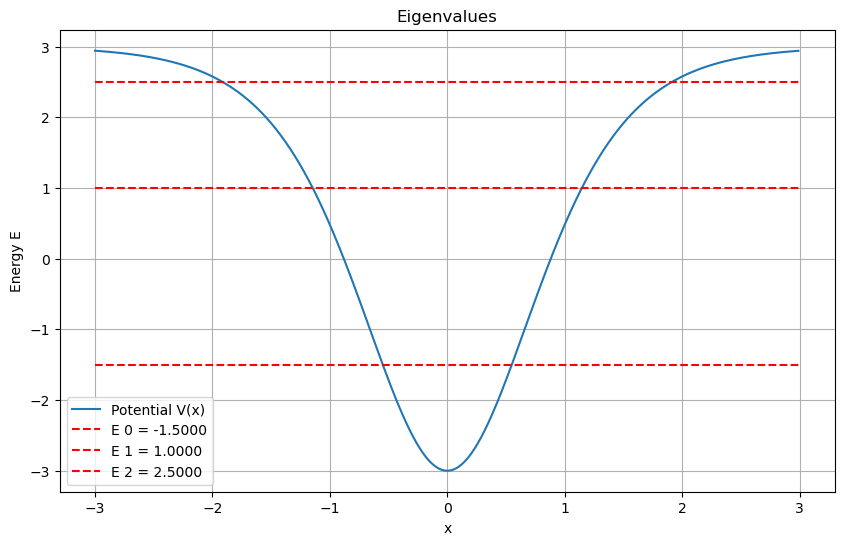

In [205]:
# Define the eigenvalues function
def E(n):
    return ((hbar ** 2 / (2 * m)) * (alpha ** 2))*(((lambda_ * (lambda_ - 1))/2) - (lambda_ - 1 - n)**2)

# Find the eigenvalues
def find_eigenvalue(n_max):
    eigenvalues = []
    for n in range (n_max):
         eigenvalues.append(E(n))
    return eigenvalues

# Print the first three eigenvalues
n_max = 3
eigenvalues = find_eigenvalue(n_max)
print("First three computed eigenvalues:", eigenvalues)

# Plot eigenvalues and potential
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential V(x)")
for i, E in enumerate(eigenvalues):
    plt.hlines(E, xmin=a, xmax=b, colors='r', linestyles='dashed', label=f'E {i} = {E:.4f}' )

# Add plot configurations
plt.title("Eigenvalues")
plt.xlabel("x")
plt.ylabel("Energy E")
plt.legend()
plt.grid()
plt.show()

Lastly, we plot the potential well and the corresponding eigenvalue and eigenfunction.

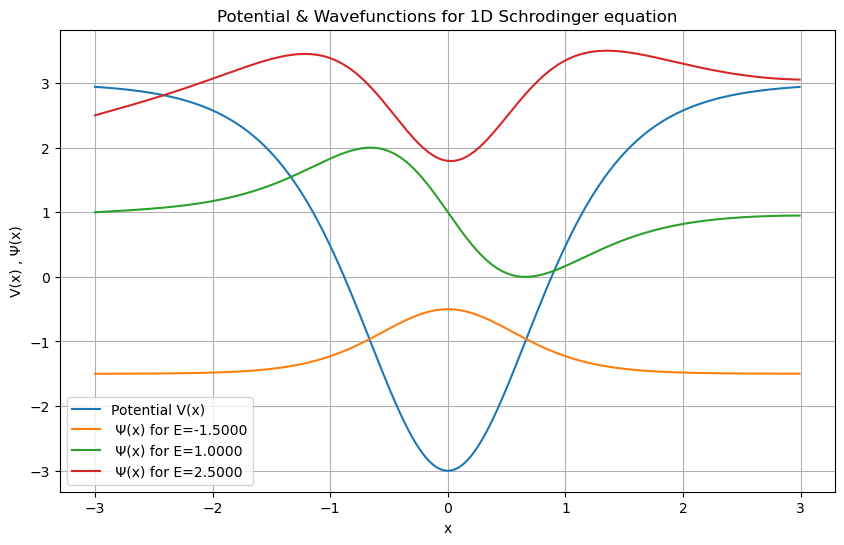

In [206]:
# Plot potential and wavefunctions
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential V(x)")

for i, E in enumerate(eigenvalues[:3]):  # Plot first 3 eigenfunctions
    psi = numerov(x, E, V)
    psi_norm = psi / np.max(np.abs(psi))  # Normalize the wavefunction
    plt.plot(x, psi_norm + E, label=f" Ψ(x) for E={E:.4f}")

plt.title("Potential & Wavefunctions for 1D Schrodinger equation")
plt.xlabel("x")
plt.ylabel("V(x) , Ψ(x)")
plt.legend()
plt.grid()
plt.show()